<img src = "https://evangsmailoa.files.wordpress.com/2019/09/ml.png"  align = "center">

#  <center>Hierarchical Clustering - Agglomerative</center>

Oke, sebelumnya kita belajar teknik Clustering dengan k-Means sekarang kita akan belajar teknik Clustering dengan <b>Agglomerative Hierarchical Clustering</b>. Perlu diingat, Agglomerative adalah salah satu model Clustering dengan pendekatan <b>bottom up</b>. <br> <br>


In [ ]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Selanjutnya kita buat <b><i> random clusters </i></b> yang kita simpan ke kelas <b> make_blobs </b>. Nah kelas ini mampu menampung banyak inputan, tapi nanti kita setting sesuai kebutuhan kita. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: Total banyaknya titik untuk nantinya akan di-cluster. </li>
    <ul> <li> Nilai: Pilih antara 10-1500 </li> </ul>
    <li> <b>centers</b>: Total pusat (center). </li> 
    <ul> <li> Nilai: Pilih array koordinat x,y antara 1-10 pusat (center). [Misal, center=[1, 1], [2, 5]] </li> </ul>
    <li> <b>cluster_std</b>: Standar deviasi dari cluster. </li>
    <ul> <li> Nilai: Pilih angka antara 0.5-1.5 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> Simpan hasilnya ke <b>X1</b> dan <b>Y1</b></li></ul>
</ul>


In [ ]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

Tampilkan hasil titik-titik random dalam bentuk **scatter plot**:

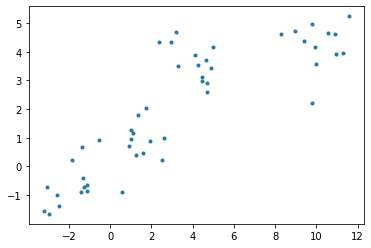

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='.') 

---
### Agglomerative Clustering
Kelas <b> Agglomerative Clustering </b> membutuhkan 2 inputan:
<ul>
    <li> <b>n_clusters</b>: Banyaknya cluster dengan pusat centroid. </li>
    <ul> <li> Misal nilainya: 4 </li> </ul>
    <li> <b>linkage</b>: Banyak link-criterion yang digunakan. </li>
    <ul> 
        <li> Nilainya: 'complete' </li> 
        <li> <b>Ingat</b>: direkomendasikan untuk coba semua dengan 'average' atau rata-rata. </li>
    </ul>
</ul> <br>
Simpan hasilnya ke dalam variabel <b> agglom </b>

In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

Pas-kan  modelnya dengan <b> X2 </b> dan <b> y2 </b> dari data sebelumnya.

In [ ]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

Oke, jalankan koding berikut untuk lihat cluster-nya! <br>
Kalo bingung tinggal baca komentarnya.

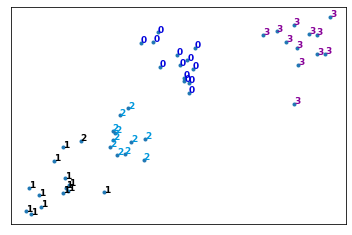

In [ ]:
# Buat gambar ukuran 6 inci x 4 inci.
plt.figure(figsize=(6,4))

# Buat range minimum dan maximum dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Cari rata-rata untuk X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Perulangan ini untuk menampilkan semua datapoint.
for i in range(X1.shape[0]):
    # Ganti data point dengan nilai respective cluster-nya 
    # (Misal. 0) kemudian beri warna dengan colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Hapus sumbu X dan Y
plt.xticks([])
plt.yticks([])
#plt.axis('off')


# Tampilkan plot data asli sebelum di-clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Tampilkan gambarnya
plt.show()


### Dendrogram Associated untuk Agglomerative Hierarchical Clustering
Perlu ingat, <b>distance matrix</b> berisi <b> distance/jarak dari satu point ke setiap point lain dalam dataset</b>. <br>
Menggunakan fungsi <b> distance_matrix, </b> membutuhkan <b>dua inputan</b>. <p>Gunakan fitur Matrix, <b> X2 </b> sebagai inputan kemudian simpan distance matrix ke variabel <b> dist_matrix </b> <br> <br>
Nilai distance simetris, dengan diagonal 0. Ini cara supaya kita tahu apakah matriksnya benar atau tidak. <br> (Jangan lupa cetak dist_matrix untuk cek benar atau tidak)

In [ ]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.69187244 0.59175757 ... 0.07498182 0.34966886 0.34713043]
 [0.69187244 0.         0.16455254 ... 0.75974739 0.34769881 0.35404603]
 [0.59175757 0.16455254 0.         ... 0.65236929 0.24475249 0.24528905]
 ...
 [0.07498182 0.75974739 0.65236929 ... 0.         0.41419852 0.410249  ]
 [0.34966886 0.34769881 0.24475249 ... 0.41419852 0.         0.01397673]
 [0.34713043 0.35404603 0.24528905 ... 0.410249   0.01397673 0.        ]]


Simpan hasilnya ke variabel <b> Z </b>

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'centroid')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Biasanya Hierarchical Clustering ditampilkan sebagai dendrogram. Setiap gabungan (merge) diwakilkan dengan garis horizontal. Koordinat Y dari garis horizontal adalah "similarity" dari dua cluster yang digabungkan (merged). Bacanya dari layer bottom ke layer top (node).
Nah selanjutnya simpan dendrogram ke variabel <b>dendro</b>.

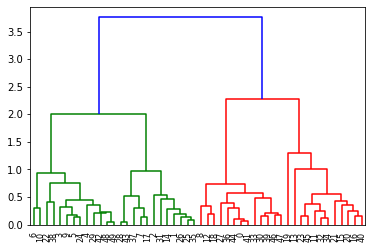

In [ ]:
dendro = hierarchy.dendrogram(Z)

## Latihan
Gunakan __complete__ linkage untuk latihan ini, gantikan ke linkage __average__ untuk lihat bagaimana perubahan pada dendogram.

In [ ]:
# write your code here


---
# Pengelompokkan Kendaraan dengan Hierarchical Clustering - Agglomerative

Misalkan kita di dunia otomotif, kemudian pingin buat prototipe untuk model kendaraan terbaru. Nah sebelum buat model terbaru, kita harus tahu terlebih dahulu model-model sebelumnya yang paling disukai di pasaran. Kita harus buat pengelompokan mobil-mobil mana yang paling mirip modelnya, kemudian mobil-mobil mana yang mirip-mirip sehingga dianggap sebagai saingannya. Nah tugas kita adalah kelompokkan mobil ke modelnya, sehingga kita bisa buat keputusan model terbaru yang harus kita buat seperti apa.
<p>Nah untuk kasus ini, seperti biasa kita butuh untuk download contoh dataset. Untuk download kita gunakan <b>`!wget`</b>. Datasetnya kita ambil dari IBM Object Storage. 

In [ ]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2020-10-05 03:48:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2020-10-05 03:48:43 (219 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



## Read data
Kalo sudah download dataset selanjutnya kita lihat fitur-fitur apa saja yang ada di model-model sebelumnya.

In [ ]:
filename = 'cars_clus.csv'

#Read csv
pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


Masing-masing fitur dapat dijelaskan sebagai berikut: harga dalam juta dolar (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) dan fuel efficiency (mpg).

### Data Cleaning
Selanjutnya kita bersihkan dataset dengan menghapus semua baris yang ada nilai <b>null</b>:

In [ ]:
print ("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Feature Selection
Kemudian kita pilih fitur yang kita mau cek:

In [ ]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalisasi
Sekarang kita normalisasi dengan panggil __MinMaxScaler__. Secara default nilainya (0, 1). \

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #kembalikan nilai array numpy
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Clustering menggunakan Scipy
Nah sekarang untuk mempermudah kita gunakan paket Scipy untuk clustering dataset: Pertama, hitung dulu distance matrix. 

In [ ]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  This is separate from the ipykernel package so we can avoid doing imports until


Dalam clustering agglomerative, setiap iterasi, harus selalu di-update <b>distance matrix</b> supaya tahu distance yang terbaru. 
Method-method berikut di Scipy untuk kalkulasi <b>distance</b> antara semua cluster terbaru:
    - single
    - complete
    - average
    - weighted
    - centroid
    
    
Untuk contoh kasus kita, kita gunakan __complete__, nanti silakan coba-coba method yang lain ya.... Feel free coy! Paling error aja....

In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

Kita dapat menentukan langsung berapa jumlah cluster:

In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

Nah sekarang mari kita gambar dendrogram-nya:

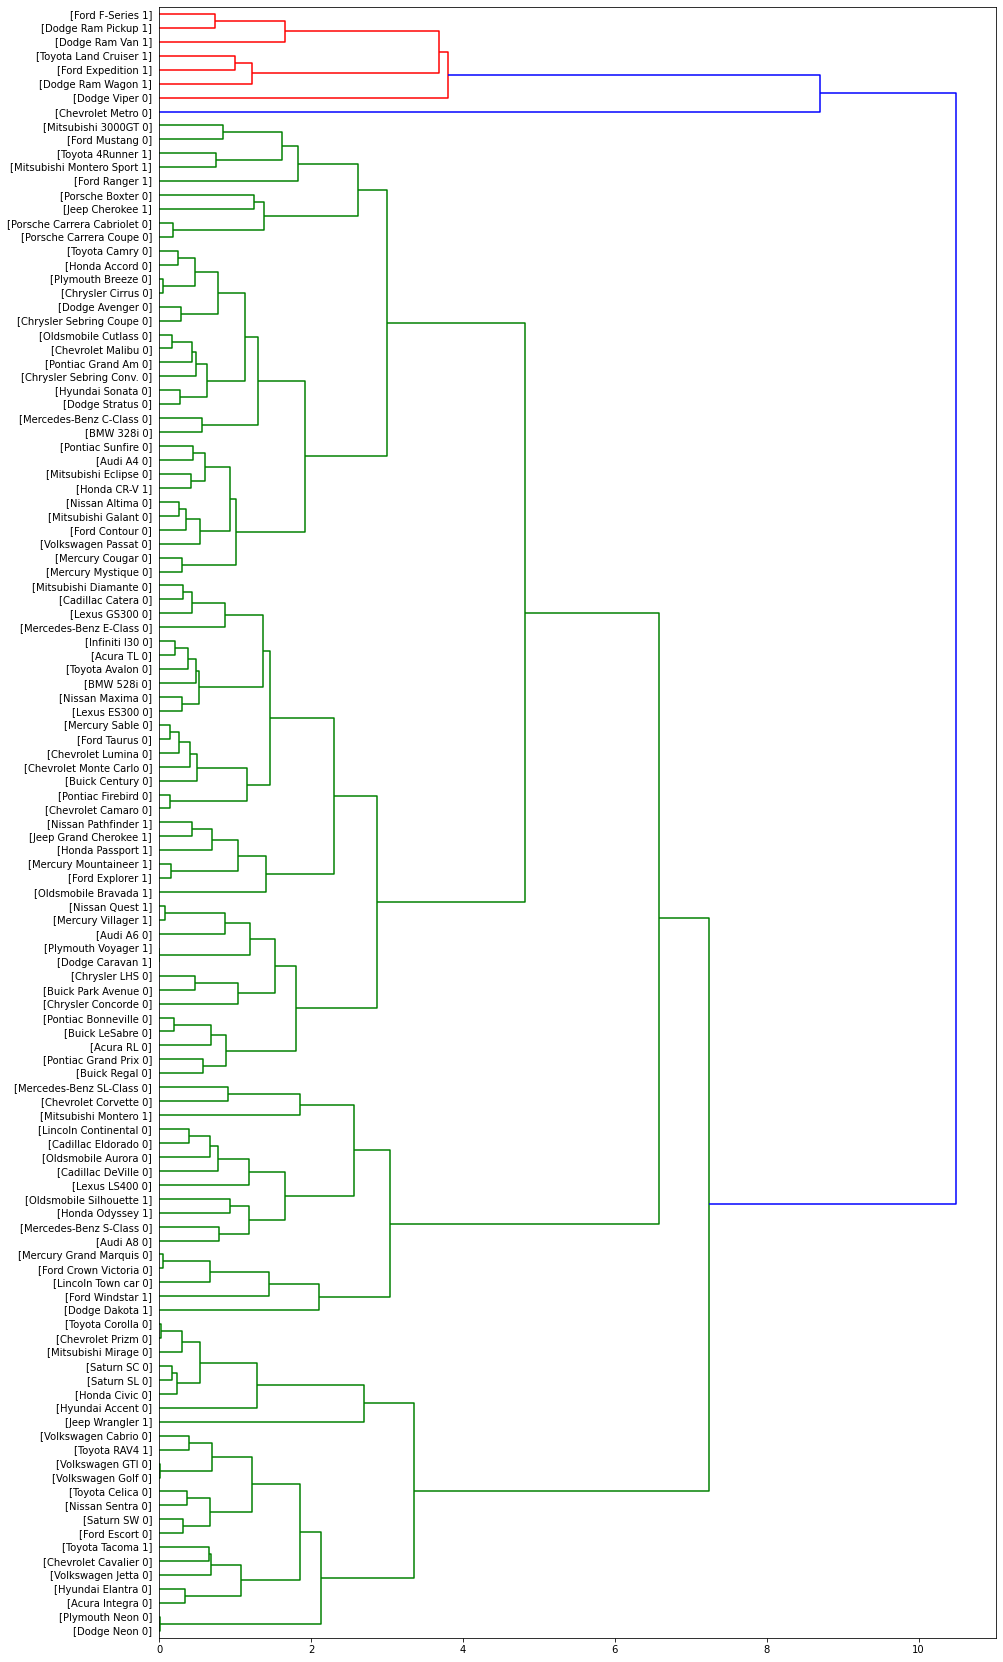

In [ ]:
fig = pylab.figure(figsize=(15,30))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =10, orientation = 'right')

## Clustering menggunakan scikit-learn
Nah sekarang kita coba dnegan menggunakan paket scikit-learn:

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

Kita bisa saja menambahkan sebuah <b>field</b> baru ke dataframe untuk menampilkan cluster dari setiap baris:

In [ ]:
pdf['cluster_'] = agglom.labels_
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

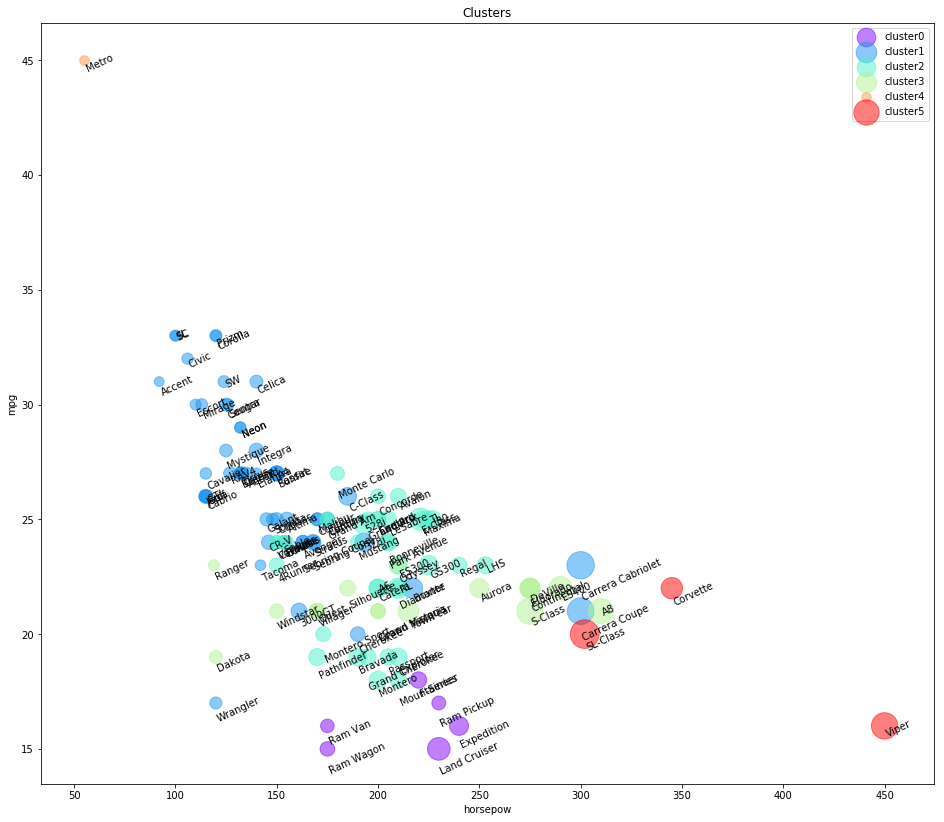

In [ ]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

seperti yang ditampilkan, kita lihat distribusi masing-masing cluster dengan <b>scatter plot</b>, sayangnya tidak terlihat jelas <b>centroid</b> dari setiap cluster. Perlu diingat, ada 2 tipe kendaraan di dataset; "truck" dan "car". Jadi kita bisa gunakan itu untuk pengelompokkan. 

In [ ]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

Sekarang kita lihat karakteristik dari masing-masing cluster:

In [ ]:
agg_cars = pdf.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

Secara jelas terlihat ada 3 cluster utama.

__Cars__:
- Cluster 1: dengan hampir semua <b>high mpg</b>, dan <b>low in horsepower</b>.
- Cluster 2: dengan <b>good mpg</b> dan <b>horsepower</b>, tapi lebih tinggi <b>price</b> daripada <b>average</b>.
- Cluster 3: dengan <b>low mpg, high horsepower, highest price</b>.
    
    
    
__Trucks__:
- Cluster 1: dengan hampir semua <b>highest mpg</b> diantara trucks, dan <b>lowest in horsepower</b> dan <b>price</b>.
- Cluster 2: dengan hampir semua <b>low mpg</b> dan <b>medium horsepower</b>, tapi <b>higher price</b> daripada <b>average</b>.
- Cluster 3: dengan <b>good mpg dan horsepower, low price</b>.


Asyiknya adalah, kita tidak perlu gunakan  __type__ , dan __price__ dalam proses clustering, tapi Hierarchical clustering bisa deteksi otomatis <b>high accuracy</b>.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0, 0.5, 'mpg')

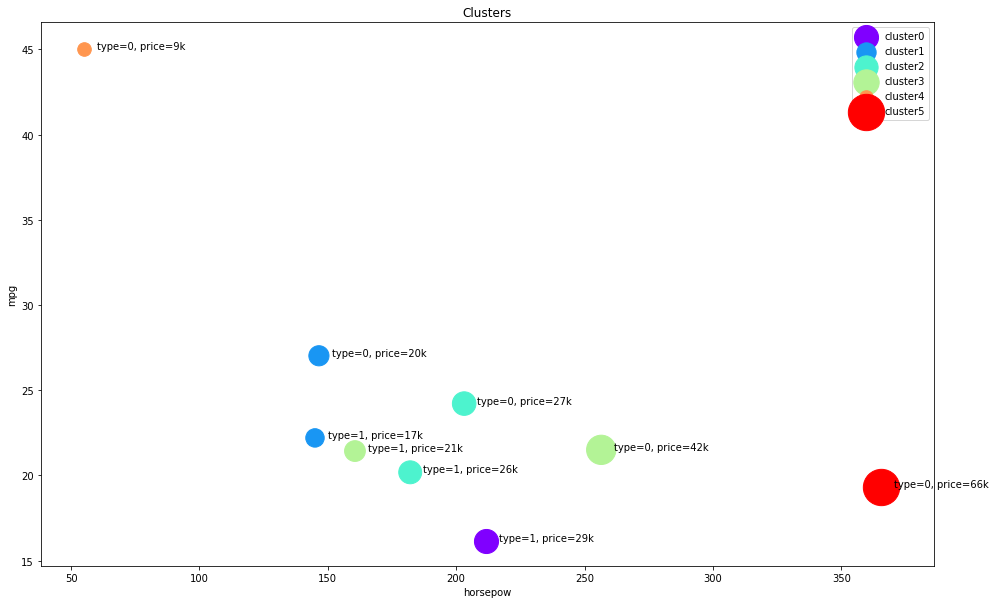

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


# <h2 id="(c)">(c)</h2>
<p>Copyright &copy; 2019 <b>Evangs Mailoa</b>.</p>

---


<p>Digunakan khusus untuk ngajar Machine Learning di Progdi Teknik Informatika - FTI UKSW</p>